In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv(r'C:\Users\raviteja\Desktop\loan_data\application_data.csv')

In [3]:
pdata = pd.read_csv(r'C:\Users\raviteja\Desktop\loan_data\previous_application.csv')

In [4]:
data.shape

(307511, 122)

In [5]:
des = pd.read_csv(r'C:\Users\raviteja\Desktop\loan_data\columns_description.csv')

In [7]:
des

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [8]:
data.isna().sum().sort_values(ascending=False)

COMMONAREA_MEDI                214865
COMMONAREA_AVG                 214865
COMMONAREA_MODE                214865
NONLIVINGAPARTMENTS_MODE       213514
NONLIVINGAPARTMENTS_MEDI       213514
                                ...  
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_WORK_REGION          0
HOUR_APPR_PROCESS_START             0
SK_ID_CURR                          0
Length: 122, dtype: int64

In [9]:
missing = pd.DataFrame(data.isna().sum().sort_values(ascending=False))

In [10]:
missing.head(10)

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_MEDI,213514
NONLIVINGAPARTMENTS_AVG,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_MEDI,210199
LIVINGAPARTMENTS_MODE,210199
LIVINGAPARTMENTS_AVG,210199


We can see that the index is of col name, so let's reset the index

In [11]:
missing.reset_index(inplace=True)

In [12]:
missing.head()

,index,0
0,COMMONAREA_MEDI,214865
1,COMMONAREA_AVG,214865
2,COMMONAREA_MODE,214865
3,NONLIVINGAPARTMENTS_MODE,213514
4,NONLIVINGAPARTMENTS_MEDI,213514


## Handling Missing Values

In [13]:
missing.rename(columns={'index':'column',0:'null_count'},inplace=True)

In [14]:
missing['percent'] = missing['null_count']/data.shape[0]

In [15]:
missing.head()

,column,null_count,percent
0,COMMONAREA_MEDI,214865,0.698723
1,COMMONAREA_AVG,214865,0.698723
2,COMMONAREA_MODE,214865,0.698723
3,NONLIVINGAPARTMENTS_MODE,213514,0.694330
4,NONLIVINGAPARTMENTS_MEDI,213514,0.694330


In [16]:
missing[missing.percent>0.5]

,column,null_count,percent
0,COMMONAREA_MEDI,214865,0.698723
1,COMMONAREA_AVG,214865,0.698723
2,COMMONAREA_MODE,214865,0.698723
3,NONLIVINGAPARTMENTS_MODE,213514,0.694330
4,NONLIVINGAPARTMENTS_MEDI,213514,0.694330
5,NONLIVINGAPARTMENTS_AVG,213514,0.694330
6,FONDKAPREMONT_MODE,210295,0.683862
7,LIVINGAPARTMENTS_MEDI,210199,0.683550
8,LIVINGAPARTMENTS_MODE,210199,0.683550
9,LIVINGAPARTMENTS_AVG,210199,0.683550


So we see that there are 40 columns with atleast 50 percent of data is missing!! 
I believe this kind of data will not make much sense even by imputation, so decided to remove those columns.

In [17]:
data.drop(missing[missing.percent>0.5]['column'].values,axis=1,inplace=True)

In [18]:
data.shape

(307511, 81)

So previously we had 122 columns, and now we removed 40 columns as they atleast 50 percent of data missing, so we are left out with 81 columns.

In [19]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

## Investigating the columns

#### At first glance we can see that there are some columns with that starts with FLAG, so we can investigate them first

In [20]:
cols_with_flag = data.columns[data.columns.str.startswith('FLAG')]

In [21]:
flag_cols_data = data[np.concatenate([cols_with_flag,np.array(['TARGET'])])]

In [22]:
cols_with_flag

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

#### Visualizing how each FLAG Column impact the target

Observing the correlation for these columns

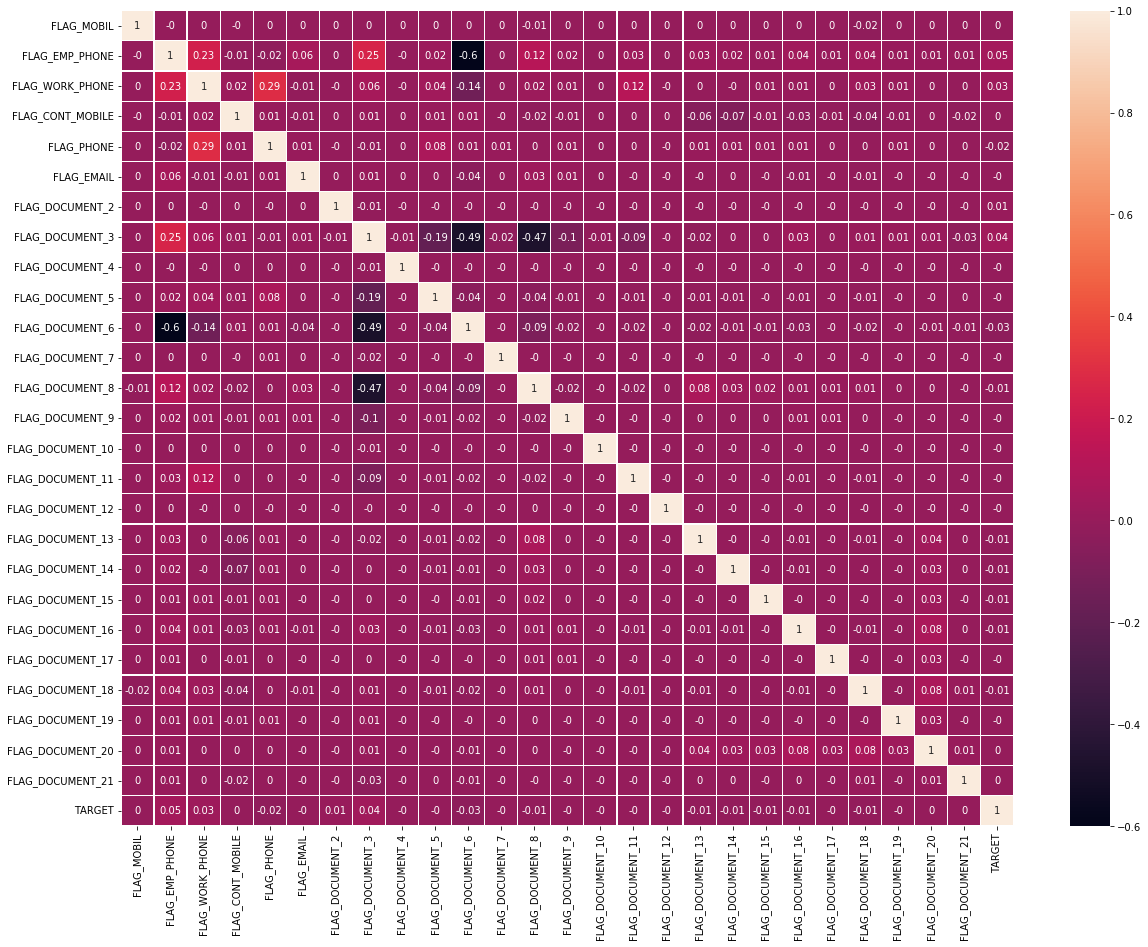

In [23]:
plt.figure(figsize=(20,15))
corr_matrix = round(flag_cols_data.corr(),2)
sns.heatmap(corr_matrix,linewidth=0.2,annot=True)

As we can see that they have very less correlation with the target, which is totally insignificant, hence we can remove them.

In [24]:
data.drop(cols_with_flag,axis=1,inplace=True)

In [25]:
data.shape

(307511, 53)

#### Checking in any other columns can be removed

In [26]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
     

In [28]:
missing = pd.DataFrame(data.isna().sum().sort_values(ascending=False))
missing.reset_index(inplace=True)
missing.rename(columns={'index':'column',0:'null_count'},inplace=True)
missing['percent'] = missing['null_count']/data.shape[0]
missing

,column,null_count,percent
0,FLOORSMAX_AVG,153020,0.497608
1,FLOORSMAX_MODE,153020,0.497608
2,FLOORSMAX_MEDI,153020,0.497608
3,YEARS_BEGINEXPLUATATION_AVG,150007,0.487810
4,YEARS_BEGINEXPLUATATION_MODE,150007,0.487810
5,YEARS_BEGINEXPLUATATION_MEDI,150007,0.487810
6,TOTALAREA_MODE,148431,0.482685
7,EMERGENCYSTATE_MODE,145755,0.473983
8,OCCUPATION_TYPE,96391,0.313455
9,EXT_SOURCE_3,60965,0.198253


In [29]:
missing[missing.percent>0.4]

,column,null_count,percent
0,FLOORSMAX_AVG,153020,0.497608
1,FLOORSMAX_MODE,153020,0.497608
2,FLOORSMAX_MEDI,153020,0.497608
3,YEARS_BEGINEXPLUATATION_AVG,150007,0.487810
4,YEARS_BEGINEXPLUATATION_MODE,150007,0.487810
5,YEARS_BEGINEXPLUATATION_MEDI,150007,0.487810
6,TOTALAREA_MODE,148431,0.482685
7,EMERGENCYSTATE_MODE,145755,0.473983


Still we can see few columns that are almost 50 percent null values, we can remove them as well.

In [30]:
data.drop(missing[missing.percent>0.4].column.values,axis=1,inplace=True)

In [31]:
data.shape

(307511, 45)

## Feature Engineering

In [86]:
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96390
EXT_SOURCE_3                   60964
AMT_REQ_CREDIT_BUREAU_YEAR     41518
AMT_REQ_CREDIT_BUREAU_MON      41518
AMT_REQ_CREDIT_BUREAU_WEEK     41518
AMT_REQ_CREDIT_BUREAU_DAY      41518
AMT_REQ_CREDIT_BUREAU_HOUR     41518
AMT_REQ_CREDIT_BUREAU_QRT      41518
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     659
AMT_GOODS_PRICE                    0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_HOUSING_TYPE                  0
NAME_INCOME_TYPE                   0
CODE_GENDER                        0
AMT_ANNUITY                        0
AMT_CREDIT                         0
AMT_INCOME_TOTAL                   0
CNT_CHILDREN                       0
DAYS_BIRTH                         0
NAME_CONTRACT_TYPE                 0
TARGET                             0
R

we can deal column wise for the rest of missing values, and if we see from the last we have 

**DAYS_LAST_PHONE_CHANGE**

In [41]:
data['DAYS_LAST_PHONE_CHANGE'].isna().sum()

1

In [48]:
data.dropna(subset=['DAYS_LAST_PHONE_CHANGE'],inplace=True)

**CNT_FAM_MEMBERS Column** 

As there is only one row with null value, decided to remove it.

In [49]:
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna((data['CNT_FAM_MEMBERS'].mode()[0]))


In [50]:
data['CNT_FAM_MEMBERS'].isnull().sum()

0

**AMT_Annuity Column** 

In [51]:
data['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307510, dtype: float64

In [54]:
data['AMT_ANNUITY'].isna().sum()

12

**Dealing Missing values of Numeric Variables**

The mean is used for normal number distributions, which have a low amount of outliers. 

If there are more outliers in the data, then median is generally used as it returns the central tendency for skewed number distributions.

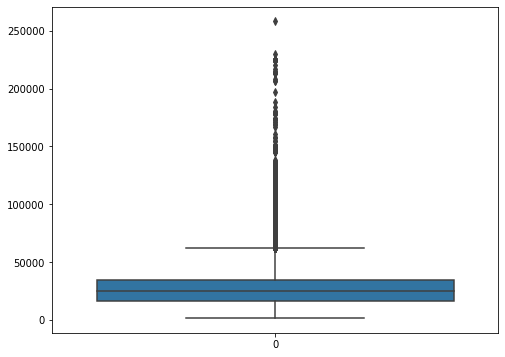

In [67]:
plt.figure(figsize=(8,6))
sns.boxplot(data['AMT_ANNUITY'])

Observing that it has significant amount of outliers, decided to impute with median

In [78]:
data['AMT_ANNUITY'] = data['AMT_ANNUITY'].fillna((data['AMT_ANNUITY'].median()))

In [79]:
data['AMT_ANNUITY'].isna().sum()

0

**AMT_GOODS_PRICE Column**

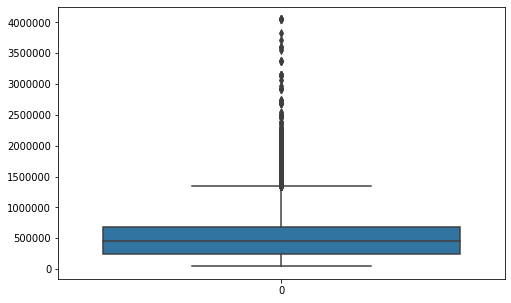

In [82]:
plt.figure(figsize=(8,5))
sns.boxplot(data['AMT_GOODS_PRICE'])

Observing that it has significant amount of outliers, decided to impute with median

In [83]:
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].fillna((data['AMT_GOODS_PRICE'].median()))

In [84]:
data['AMT_GOODS_PRICE'].isna().sum()

0

In [85]:
data['EXT_SOURCE_2']

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
307506    0.681632
307507    0.115992
307508    0.535722
307509    0.514163
307510    0.708569
Name: EXT_SOURCE_2, Length: 307510, dtype: float64